## This a banks customer Churn dataset 
exited is the target variable 1 :- exited , 0 :- stayed

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pickle

/Users/kishan/Desktop/python/env/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [49]:
df=pd.read_csv("Churn_Modelling.csv")

In [50]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [53]:
df.shape

(10000, 14)

In [8]:
#Preprocessing 
# remove unnecessary columns 
# check for empty values
# encode categorical variable (Gender F=0,M=1)(Geography one hot encoder)
# Divide in x and y variables then do train_test_split
# standerize the values 


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# remove unnecessary columns 

In [11]:
df=df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# check for empty values

In [28]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [29]:
# LabelEncoder on Gender
label_enc_gender=LabelEncoder()
df["Gender"]=label_enc_gender.fit_transform(df.Gender)

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [32]:
# one hot on geography 
one_hot_geo=OneHotEncoder()
geo_encoded=one_hot_geo.fit_transform(df[['Geography']])

In [33]:
geo_encoded=geo_encoded.toarray()

In [34]:
one_hot_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [35]:
# Now we have got a array of shape(10000,3 ) . we will make these as columns in df and remove the old Geography column 


In [36]:
new_geo=pd.DataFrame(geo_encoded,columns=one_hot_geo.get_feature_names_out(['Geography']))

In [37]:
new_geo.shape

(10000, 3)

In [38]:
new_geo.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [39]:
df=df.drop(['Geography'],axis=1)

In [40]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,1


In [41]:
df=pd.concat([df,new_geo],axis=1)

In [42]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [43]:
# saving the encoders 

In [44]:
with open('one_hot_geo.pkl','wb')as file:
    pickle.dump(one_hot_geo,file)

with open('label_enc_gender.pkl','wb')as file:
    pickle.dump(label_enc_gender,file)

In [45]:
# Divide in x and y features
x=df.drop(['Exited'],axis=1)
y=df['Exited']

# Do train test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

# Standerizing the values 
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [46]:
# dumping our scaler
with open("scaler.pkl",'wb') as file:
    pickle.dump(scaler,file)

<Axes: >

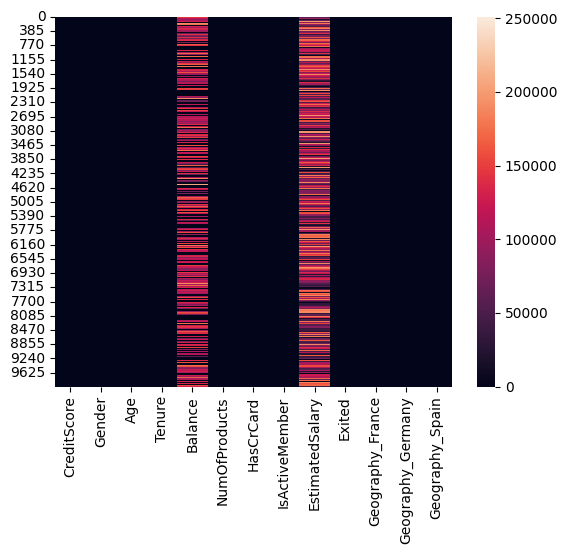

## Creating the ANN
1. Sequential NN
2. Dense
3. Activation Function
4. Optimizer
5. Loss function
6. Metrics


In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime


In [43]:
x_train.shape[1]

12

In [45]:
# Building the model
model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),   #this is HL1 with input shape as 12 
    Dense(32,activation='relu'),   # HL2 
    Dense(1,activation='sigmoid')  #Output layer
])

/Users/kishan/Desktop/python/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# initializing the optimizer and loss 
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()

In [52]:
# Compiling the Model

# model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

# the problem with this is we cant control the learning rate there for we can initialize the optimizer some other place 
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

In [58]:
# setting the Tensorboard
log_dir="logs/fit/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [59]:
# Setup Early Stopping 
# Helps when the model doesnt improve in respective epochs 


early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [60]:
# Training the model
history=model.fit(
    x_train,y_train,validation_data=(x_test,y_test),epochs=100,callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.8655 - loss: 0.3323 - val_accuracy: 0.8583 - val_loss: 0.3489
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.8666 - loss: 0.3275 - val_accuracy: 0.8527 - val_loss: 0.3649
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.8720 - loss: 0.3207 - val_accuracy: 0.8570 - val_loss: 0.3548
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.8703 - loss: 0.3117 - val_accuracy: 0.8563 - val_loss: 0.3582
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8629 - loss: 0.3236 - val_accuracy: 0.8590 - val_loss: 0.3501
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.8608 - loss: 0.3370 - val_accuracy: 0.8560 - val_loss: 0.3750
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.8760 - loss: 0.3088 - val_accuracy: 0.8530 - val_loss: 0.3580
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.8712 - loss: 0

In [61]:
model.save('First.h5')

checking the Log

In [62]:
# %load_ext tensorboard

In [64]:
# %tensorboard --logdir logs/fit